In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import  r2_score


In [3]:
%cd C:\Users\Faiz\Desktop\Data

C:\Users\Faiz\Desktop\Data


In [4]:
df1= pd.read_csv('Position Salary .csv')
print (df1)


            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [5]:
x= df1.iloc[:,1:2].values
print (x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
y= df1.iloc[:,2].values
print (y)


[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


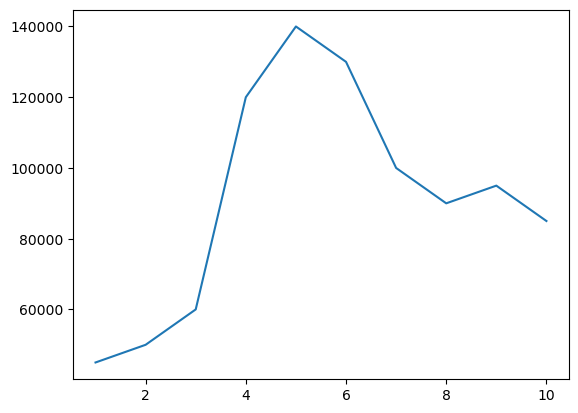

In [7]:
plt.plot(x,y)
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
print (reg)


LinearRegression()


In [9]:
lr_pred = reg.predict (x)
print (lr_pred)


[ 70909.09090909  75484.84848485  80060.60606061  84636.36363636
  89212.12121212  93787.87878788  98363.63636364 102939.39393939
 107515.15151515 112090.90909091]


In [10]:
lr_result =  pd.concat ([df1, pd.DataFrame(lr_pred,columns = ['Prediction'])],axis = 1 )
lr_result['Difference'] = lr_result['Salary'] - lr_result['Prediction']
print (lr_result)


            Position  Level  Salary     Prediction    Difference
0   Busienss Analyst      1   45000   70909.090909 -25909.090909
1  Junior Consultant      2   50000   75484.848485 -25484.848485
2  Senior Consultant      3   60000   80060.606061 -20060.606061
3            Manager      4  120000   84636.363636  35363.636364
4    Country Manager      5  140000   89212.121212  50787.878788
5     Region Manager      6  130000   93787.878788  36212.121212
6            Partnor      7  100000   98363.636364   1636.363636
7     Senior Partnor      8   90000  102939.393939 -12939.393939
8            C Level      9   95000  107515.151515 -12515.151515
9               CEO      10   85000  112090.909091 -27090.909091


In [11]:
accuracy = r2_score (y,lr_pred)
print (accuracy)


0.17895348198378502


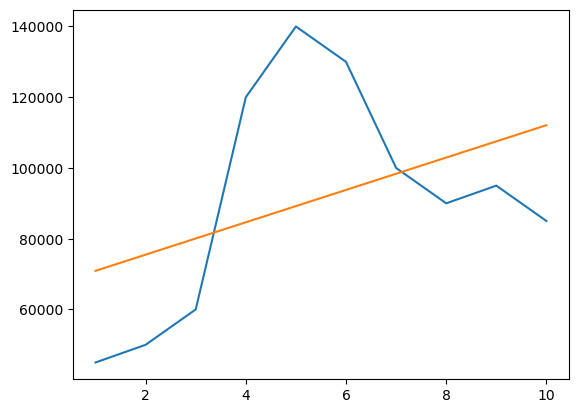

In [12]:
plt.plot (x,y)
plt.plot (x,lr_pred)
plt.show()


In [13]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt = dt.fit(x,y)

In [14]:
y_pred = dt.predict(x)
y_pred

array([ 45000.,  50000.,  60000., 120000., 140000., 130000., 100000.,
        90000.,  95000.,  85000.])

In [15]:
y

array([ 45000,  50000,  60000, 120000, 140000, 130000, 100000,  90000,
        95000,  85000], dtype=int64)

In [16]:
accuracy = r2_score(y,y_pred)
print(accuracy)

1.0


C:\Users\Faiz\AppData\Local\Temp\ipykernel_14516\4245915008.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.1)


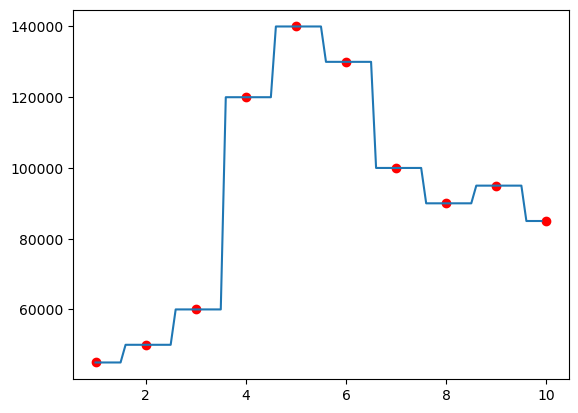

In [17]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, dt.predict(x_grid))
plt.show()


C:\Users\Faiz\AppData\Local\Temp\ipykernel_14516\758695755.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.1)


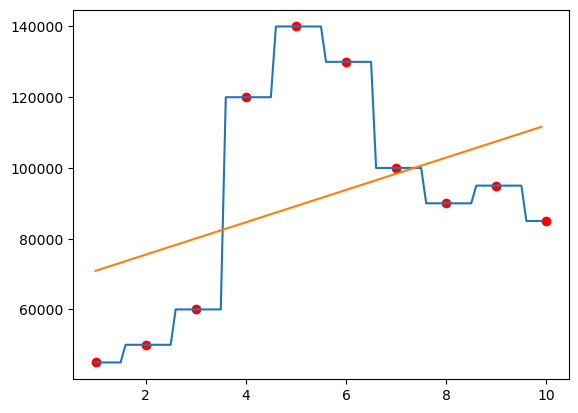

In [18]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, dt.predict(x_grid))
plt.plot(x_grid, reg.predict(x_grid))
plt.show()


In [19]:
y_pred

array([ 45000.,  50000.,  60000., 120000., 140000., 130000., 100000.,
        90000.,  95000.,  85000.])

In [20]:
from sklearn.tree import DecisionTreeRegressor
split_dt =DecisionTreeRegressor(min_samples_split=8)
split_dt .fit(x,y)
print (split_dt )


DecisionTreeRegressor(min_samples_split=8)


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor (n_estimators =5)
rf.fit(x,y)
print (rf)

RandomForestRegressor(n_estimators=5)


In [23]:
y_pred = rf.predict(x)
print (y_pred)


[ 64000.  64000.  72000.  96000. 134000. 124000. 106000.  92000.  94000.
  91000.]


In [24]:
accuracy = r2_score(y,y_pred)
print (accuracy)


0.8522662522662523


In [25]:
result =  pd.concat ([df1, pd.DataFrame(y_pred,columns = ['Prediction'])],axis = 1 )
result['Difference'] = result['Salary'] - result['Prediction']
print (result)


            Position  Level  Salary  Prediction  Difference
0   Busienss Analyst      1   45000     64000.0    -19000.0
1  Junior Consultant      2   50000     64000.0    -14000.0
2  Senior Consultant      3   60000     72000.0    -12000.0
3            Manager      4  120000     96000.0     24000.0
4    Country Manager      5  140000    134000.0      6000.0
5     Region Manager      6  130000    124000.0      6000.0
6            Partnor      7  100000    106000.0     -6000.0
7     Senior Partnor      8   90000     92000.0     -2000.0
8            C Level      9   95000     94000.0      1000.0
9               CEO      10   85000     91000.0     -6000.0


C:\Users\Faiz\AppData\Local\Temp\ipykernel_14516\3017179038.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.1)


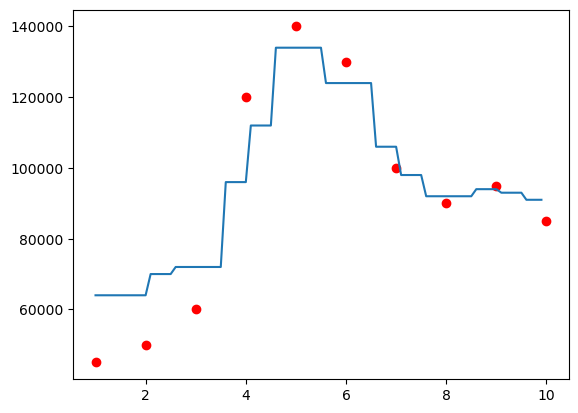

In [26]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, rf.predict(x_grid))
plt.show()


In [27]:
arr1 = np.array([10,12])
print (arr1)
arr1= arr1.reshape (2,1)
print (type(arr1))
y_pred= rf.predict(arr1)
print (arr1,y_pred )


[10 12]
<class 'numpy.ndarray'>
[[10]
 [12]] [91000. 91000.]


In [28]:
dt.predict([[3],[3.4],[3.8]])

array([ 60000.,  60000., 120000.])